In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../../modules')

In [2]:
import numpy as np
import common_plots
import factors
import plotly.graph_objects as go

# Common Distributions
There are many different natural distributions, some of which are covered here: <br>

## Discrete Distributions
The probability function for a discrete set of events/models is called the probability mass function, denoted $P$. It assigns a probability to each individual event, such that the probabilities sum to 1. 
### The Bernoulli Distribution
The Bernoulli distribution has two possible outcomes, "yes" or "no", predicted by a single variable $\theta$, the probability of "yes". The probability of "no" is given $1-\theta$. Often "heads" ($h$) and "tails" ($t$) are used instead due to the comparison with a bent coin. 
### The Binomial Distribution
The binomial distribution describes the probabilities for a set of bernoulli samples. The total number of "yes" or "heads" results, $k$, for $n$ trials is given:
$$P(k|n,\theta)=\frac{\theta^k (1-\theta)^{n-k}n!}{k!(n-k)!}$$
Which can be rewritten: <br>
$$P(k|n,\theta)={n \choose k} \theta^k (1-\theta)^{n-k}$$

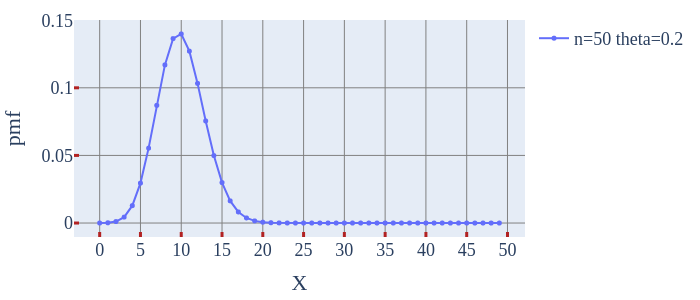

In [3]:
# A binomial distribution with low chance of heads skews left
fig = common_plots.plot_binomial(theta=0.2,n=50)
fig.show(renderer="png",width=700,height=300)

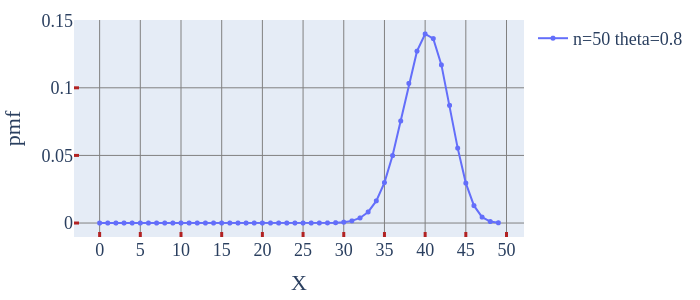

In [4]:
# Likewise a high change of heads skews right
fig = common_plots.plot_binomial(theta=0.8,n=50)
fig.show(renderer="png",width=700,height=300)

### Categorical distribution
The categorical distribution is just the extension of the bernoulli distribution to more than 2 possibilities. For instance, a factor with 1 variable can represent a categorical distribution:

In [5]:
f = factors.Factor(["variable A"], [4])
f.set_all(([0.5,0.25,0.05,0.2]))
print(f)

variable A  Values (10 dp)
0           0.5
1           0.25
2           0.05
3           0.2



### Multinomial distribution
The multinomial distribution is the extension of the binomial to categorical samples. The probability for $n$ trials where $i$ is the index of the variable and $k$ is the number of categorical variables and $x_i$ is the variable counts is given:
$$ \frac{n!}{\prod_{i=0}^k x_i}\prod_{i=0}^k P_i^{x_i} $$ <br>
Where $P_i$ is the probability of the $i$th categorical outcome such that $\sum_{i=0}^k P_i =1$

## Continuous Distributions
With continuous distributions the probability mass function becomes the probability density function $p$. We instead define the probability that the variable in question lies between $x$ and $x+dx$ as $p(x)dx$. This is naturally just a crude approximation, assuming the probability stays the same from $x$ to $x+dx$. However, as $dx \rightarrow 0$ this approaches the true distribution. Remembering $\sum_x p(x)=1$, it must be true $\int p(x)dx=1$. The integration of the probability density function $p(x)$ between $-\inf$ and $x$ gives the cumulative density function $P(x)$, which is the probability the variable in question falls below $x$.
### The uniform distribution
One of the more simple distributions is the uniform one. It simply assigns all options an equal probability in a given range from $a$ to $b$. The function is defined:
$$
p(x|a,b)=
\Bigg\{
\begin{aligned}
  & \frac{1}{b-a} \hspace{0.5cm} \text{for} \hspace{0.25cm}  X \epsilon [a,b] \\
  & 0 \hspace{1.5cm} \text{otherwise}
\end{aligned}
$$
The integration to 1 can be easily checked:
$$
\begin{aligned}
  \int_a^b \frac{1}{b-a}dx  &= \bigg[ \frac{x}{b-a} \bigg]_a^b \\
  &= \frac{b}{b-a} - \frac{a}{b-a} \\
  &= \frac{b-a}{b-a} \\
  &= 1 \\
\end{aligned}
$$
The support for a distribution refers to the areas where the probability is non-negative. In the above case the support is from $a$ to $b$

### The 1D Gaussian distribution
The most commonly used distribution is the Gaussian. <br>
It is very unique - e.g see the Central Limit Theorem. <br>
Most importantly it is often tractable to calculate. For instance, see a Gaussian convolution.
The probability of a gaussian is defined by a mean $\mu$ and variance $\sigma^2$ given:
$$ p(x|\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\tfrac{1}{2} \tfrac{(x-\mu)^2}{\sigma^2}}$$


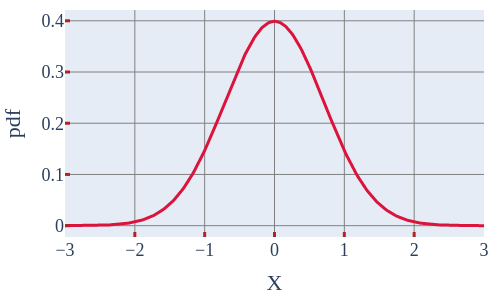

In [6]:
fig = common_plots.plot_1D_Gaussian(0,1)
fig.show(renderer="png",width=500,height=300)

### The multivariate Gaussian
This is the extension of the 1d Gaussian to $k$ dimensions. It is then defined by a mean vector $\mu$ and a covariance matrix $\Sigma$, with the pdf:
$$p(x|\mu,\Sigma)={(2\pi)}^{-\tfrac{k}{2}}{\det{(\Sigma)}}^{-\tfrac{1}{2}}e^{-\tfrac{1}{2} \mbox{$(x-\mu)^T \Sigma^{-1} (x-\mu)$}}$$

Of course, other distributions like the sigmoid also exist, but I'm not going to list them all. 

## The mixture model
In a mixture model each component is a distribution $q_i(x)$ which is then multiplied by a given mixing weight $w_i$. If the weights sum to 1 then the resulting function is also a probability density function. 
The pdf is written: <br>
$$p(x|q,w)=\int_i w_i q_i(x) $$
In most cases the number of models in the mixture is not infinite, but it can be so I am writing it that way here. 
The integration to 1 can be proved: <br>
$$
\begin{aligned}
  \int_x \int_i w_i q_i(x)  &= \int_i w_i \int_x q_i(x) \\
  &= \int_i w_i \\
  &= 1
\end{aligned}
$$
An example of a common mixture model is the mixture of gaussians, abbreviated MoG:

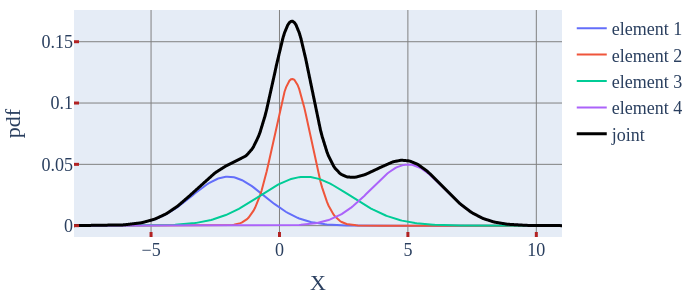

In [7]:
means = [-2,0.5,1,5]
sigmas = [2,1,2.5,2]
weights = [0.2,0.3,0.25,0.25]
fig = common_plots.plot_1D_MoG(means,sigmas,weights)
fig.show(renderer="png",width=700,height=300)

## Joint distributions
Joint distributions refer to the probabilities of multiple events/models being true. In the discrete case this can be represented with a factor as discussed in p1, e.g:

In [8]:
f = factors.Factor(["A","B","C"], [2,3,2])
f.set_all([0.1,0.1,0.05,0.02,0.08,0.03,0.2,0.02,0.26,0.03,0.04,0.07])
print(f)

A  B  C  Values (10 dp)
0  0  0  0.1
0  0  1  0.1
0  1  0  0.05
0  1  1  0.02
0  2  0  0.08
0  2  1  0.03
1  0  0  0.2
1  0  1  0.02
1  1  0  0.26
1  1  1  0.03
1  2  0  0.04
1  2  1  0.07



## Linear Gaussian Models
A linear gaussian model refers to a model which is gaussian, except the mean is a linear function of $x$ (shrinking box is a problem, could fix with \mbox but it won't render it github): <br>
$$ p(y|x,w,b,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\tfrac{1}{2} \frac{(y-x\cdot w+b)^2}{\sigma^2}}$$
Examples, with the opacity set to the pdf:

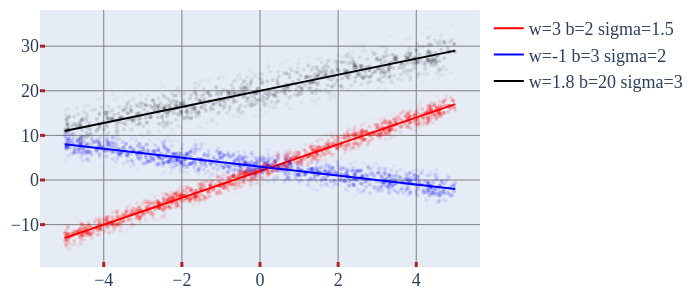

In [9]:
x_line = np.linspace(-5,5,2)
x_samples = np.random.uniform(-5,5,1000)
fig = go.Figure()
for w,b,sigma,color in [(3,2,1.5,"red"),(-1,3,2,"blue"),(1.8,20,3,"black")]:
    name = "w={} b={} sigma={}".format(w,b,sigma)
    y_line = x_line*w+b
    y_samples = np.array([np.random.normal(x_i*w+b,sigma) for x_i in x_samples])
    y_prob = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((y_samples-(x_samples*w+b))**2)/(sigma**2))
    fig.add_trace(go.Scatter(x=x_samples, 
                             y=y_samples,
                             mode="markers",
                             showlegend=False,
                             marker=dict(size=4,color=color,opacity=y_prob)))
    fig.add_trace(go.Scatter(x=x_line, 
                             y=y_line,
                             name=name,
                             mode="lines",
                             showlegend=True,
                             line=dict(width=2,color=color)))
    common_plots.set_basic_layout(fig)
fig.show(renderer="png",width=700,height=300)

You can also have conditional linear gaussian models, with some additional $z$ parameter determining which line to use. 